In [1]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import shutil

In [2]:
gcn_name = "GCN" 
orb_name = "ORB"

current_path = os.path.abspath("focus_eval.ipynb")
project_path = "../Monocular/video_results"
project_path = os.path.join(os.path.dirname(current_path), project_path)

gcn_path = project_path+"/"+gcn_name+"/"
orb_path = project_path+"/"+orb_name+"/"

text_names = ["KeyFrameTrajectory_max.txt","KeyFrameTrajectory_mid.txt"]

In [21]:
def read_video_results(path):
    pts = []
    with open(path,'r') as f_tmp:
        content_pt = f_tmp.readlines()
        for pt in content_pt:
            x = pt.split()[0]
            y = pt.split()[1]
            pts.append([x,y])
            #print(x, y)
        #print("total frames = ", frame_number)
        return pts

In [22]:
orb_pts = read_video_results(orb_path+text_names[0])
gcn_pts = read_video_results(gcn_path+text_names[0])

In [37]:
def plot_both_trajectory(orb_pts, gcn_pts, test_name, save_path):
    #orb_x, orb_y = zip(*orb_pts)
    plt.plot(*np.array(orb_pts).T,label="orb")
    #plt.scatter(orb_x, orb_y,label="orb")
    #gcn_x, gcn_y = zip(*gcn_pts)
    #plt.scatter(gcn_x, gcn_y,label="gcnv2")
    plt.plot(*np.array(gcn_pts).T,label="gcnv2")
    plt.title("keyframe trajectories for the "+test_name)
    plt.legend()
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.savefig(save_path+'/'+test_name+'trajectories.png')
    plt.show()

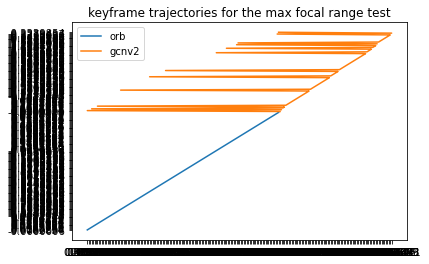

In [38]:
plot_both_trajectory(orb_pts, gcn_pts, "max focal range test", project_path)

In [3]:
def read_results(path):
    total_number_of_frame_points = 0
    frame_number = 0
    frame_points = []
    feature_number_per_frame = []
    count = 0
    with open(path,'r') as f_tmp:
        content_pt = f_tmp.readlines()
        for pt in content_pt:
            if(pt=="\n"):
                frame_number+=1
                feature_number_per_frame.append(count)
                count = 0
                continue
            coordinates = pt.replace('[',' ').replace(']',' ').replace(',',' ').split()
            coordinates = np.array(coordinates, dtype=np.float64)
            total_number_of_frame_points += 1
            count += 1
            frame_points.append(coordinates)
            #print(coordinates)
        #print("total frames = ", frame_number)
        return np.array(frame_points), feature_number_per_frame

In [4]:
def plot_feature_point_distribution(coordinate_xs,coordinate_ys,test_name, save_path):
    # plot point distribution
    #plt.scatter(coordinate_xs, coordinate_ys)
    #plt.show()

    # plot point distribution density histogram
    h = plt.hist2d(coordinate_xs, coordinate_ys)
    plt.colorbar(h[3])
    plt.title(test_name+": feature point distribution density")
    plt.savefig(save_path+'/'+test_name+'_feature_point_distribution_density.png')
    plt.show()
    

In [6]:
def plot_feature_number_changes(orb_number, gcn_number, test_name, ranges, save_path):
    plt.plot(range(ranges), orb_number[:ranges],label="orb")
    plt.plot(range(ranges), gcn_number[:ranges],label="gcnv2")
    plt.title(test_name)
    plt.legend()
    plt.xlabel("frame")
    plt.ylabel("feature matches number")
    plt.savefig(save_path+'/'+test_name+'_macthes_number.png')
    plt.show()

In [9]:
def run_eval():
    text_names = ["match_1.txt","match_2.txt","match_r.txt"]
    test_names = ["one way", "two way", "random way"]
    ranges = [25, 50, 65]
    for i in range(3):
        orb_pts, orb_number = read_results(orb_path+text_names[i])
        gcn_pts, gcn_number = read_results(gcn_path+text_names[i])
        title = test_names[i]
        plot_feature_point_distribution(orb_pts[:,0],orb_pts[:,1],title+" ORB",orb_path)
        plot_feature_point_distribution(gcn_pts[:,0],gcn_pts[:,1],title+" GCNv2",gcn_path)
        plot_feature_number_changes(orb_number,gcn_number,title,ranges[i],project_path)

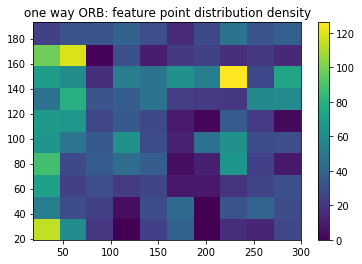

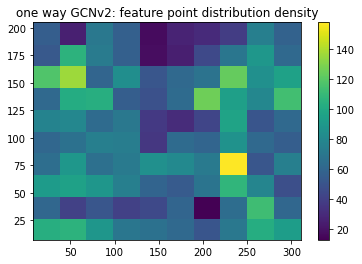

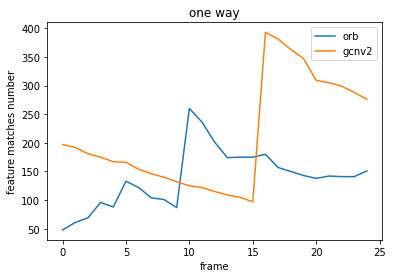

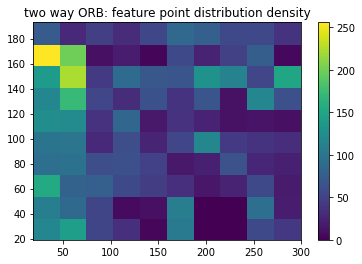

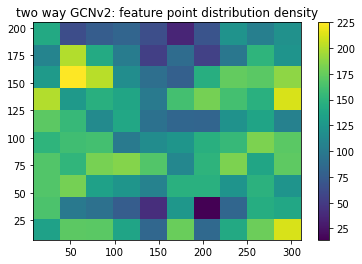

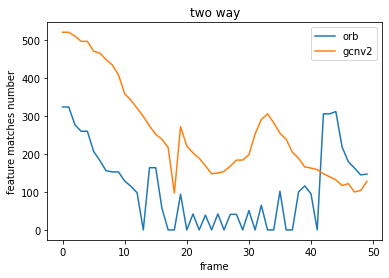

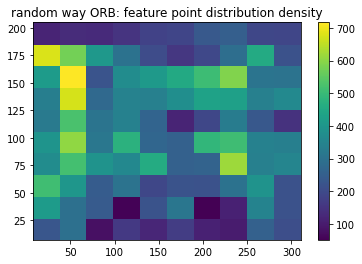

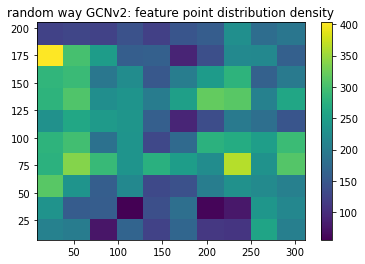

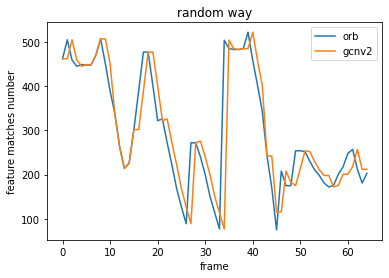

In [10]:
run_eval()

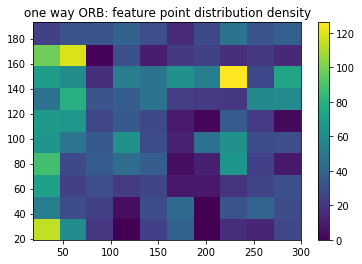

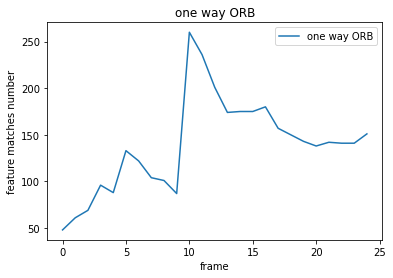

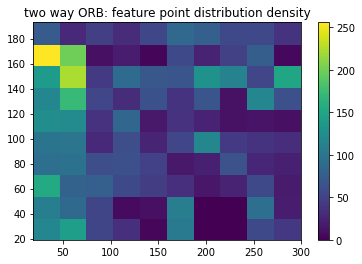

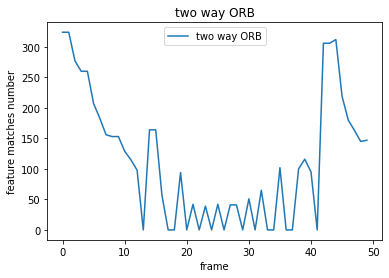

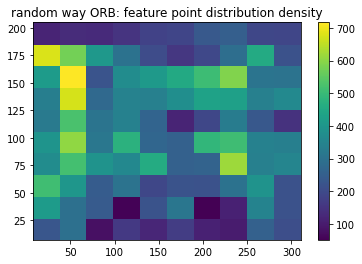

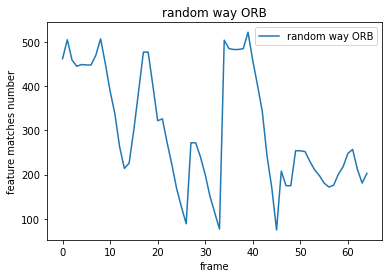

In [23]:
run_eval(orb_path,orb_name)

In [97]:
GCN_1_pts, GCN_1_number = read_results(test_path+text_names[0])

print("feature detected for each frame: ", GCN_1_number)

total frames =  31
feature detected for each frame:  [197, 192, 181, 175, 167, 166, 154, 146, 140, 132, 125, 122, 115, 109, 105, 97, 393, 381, 363, 347, 309, 305, 299, 288, 276, 290, 284, 281, 286, 290, 282]


In [98]:
unique_points_gcn_1 = (np.unique(GCN_1_pts,axis=0))
print(unique_points_gcn_1.shape)
GCN_1_pts = np.array(GCN_1_pts)
print(GCN_1_pts.shape)

(2635, 2)
(6997, 2)


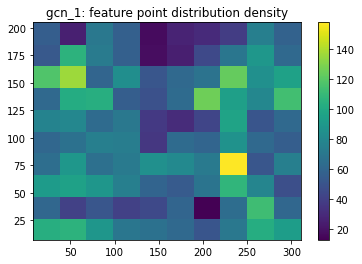

In [100]:
plot_feature_point_distribution(GCN_1_pts[:,0],GCN_1_pts[:,1],"gcn_1")

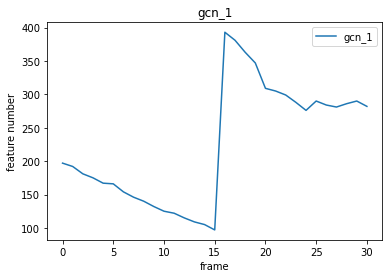

In [102]:
plot_feature_number_changes(GCN_1_number,"gcn_1")